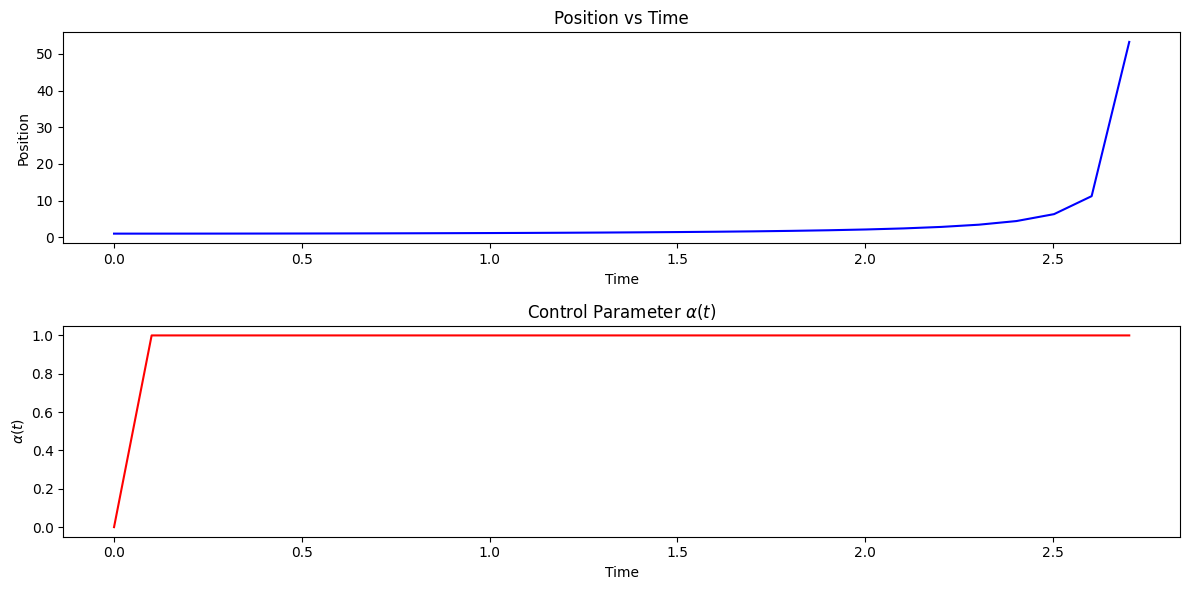

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the Duffing equation
def duffing(t, y, beta, delta, gamma, omega, alpha):
    x, v = y
    dxdt = v
    dvdt = -delta * v - alpha(t) * x + beta * x**3 + gamma * np.cos(omega * t)
    return [dxdt, dvdt]

# Time-varying alpha using a square wave
def alpha(t):
    return 1 * np.sign(np.sin(0.2 * t))  # Periodic switch between +1 and -1

# Parameters
delta = 0.1  # Damping coefficient
beta = 1     # Nonlinear stiffness
gamma = 0.3  # Amplitude of the driving force
omega = 1    # Frequency of the driving force

# Time settings
t_span = (0, 100)
t_eval = np.linspace(*t_span, 1000)

# Initial conditions: [x0, v0]
y0 = [1, 0]

# Solve the Duffing equation over time
sol = solve_ivp(lambda t, y: duffing(t, y, beta, delta, gamma, omega, alpha), t_span, y0, t_eval=t_eval)

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(sol.t, sol.y[0], 'b')
plt.title('Position vs Time')
plt.xlabel('Time')
plt.ylabel('Position')

plt.subplot(212)
plt.plot(sol.t, [alpha(t) for t in sol.t], 'r')
plt.title('Control Parameter $\\alpha(t)$')
plt.xlabel('Time')
plt.ylabel('$\\alpha(t)$')

plt.tight_layout()
plt.show()
